<a href="https://colab.research.google.com/github/Deep4337/ML-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 : How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

For each element in the resulting (n x m) matrix, you perform a dot product of a row from the first matrix and a column from the second. This involves k multiplications for each element. Since there are n rows and m columns in the resulting matrix, the total number of multiplications is n * k * m

In the dot product calculation, you add the results of k multiplications. Therefore, you have k-1 additions for each element in the resulting matrix. Since there are n rows and m columns, the total number of additions is n * (k-1) * m.

Question 2 : Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [2]:
# question 2:
# Using Python
matrix1 = [
    [1, 2, 3],
    [3, 4, 5]
]  # 2 x 3

matrix2 = [
    [5, 6],
    [7, 8],
    [9, 10]
]  # 3 x 2

n = len(matrix1)        # like It has 2 rows
m = len(matrix1[0])     # 3 elements (columns of matrix1)
k = len(matrix2[0])     # 2 (columns of matrix2)

# Initialize result matrix of size n x k
result = []
for i in range(n):
    row = []
    for j in range(k):
        row.append(0)
    result.append(row)
print(result)
# Perform matrix multiplication
for i in range(n):
    for j in range(k):
        for r in range(m):  # or range(len(matrix2))
            result[i][j] += matrix1[i][r] * matrix2[r][j]

# Print result
print(result)


[[0, 0], [0, 0]]
[[46, 52], [88, 100]]


In [3]:
# Question 2
# Using Numpy
import numpy as np
arr1= np.array([[1,2,3],[3,4,5]])
arr2= np.array([[5,6],[7,8],[9,10]])
print(np.matmul(arr1,arr2))

[[ 46  52]
 [ 88 100]]


Q2: part c) Numpy is Faster than python list in the following ways : -

I) Numpy Has Homogeneous Data Storage :-   
Suppose we store a matrix [1,2,3,4] using numpy it will store all the matrix in a single data type in the form of Integer but in the case if we use python to store the same it although every element might be stored as an integer but actually Python stores it as a pointer instead of directly storing it as an integer.

IN PYTHON
List object
 ├── pointer → int(1) object
 ├── pointer → int(2) object
 ├── pointer → int(3) object
 └── pointer → int(4) object
Each pointer stores the address of a separate Python int object.

Each int object lives somewhere else in memory.
IN NUMPY :
Memory block:
[ 00000001 | 00000002 | 00000003 | 00000004 ]
No pointers, no separate objects.

All elements are exactly the same size (determined by dtype), so NumPy can compute any elements address instantly.

II) Numpy has Continuous Memory Storage:

As discussed above, Numpy has
No gaps between elements.

The stride (distance in bytes between consecutive elements) is fixed.

NumPy can access and process elements in a tight loop without chasing pointers.

Unlike Python where there are several loops working which increases the time.

Question 3:

a) Finding the highest element in a list requires one pass of the array

In [5]:
a=[8,2,6,9,10]
def max(a):
  max=0
  for i in range(len(a)):
    if(a[i]>max):
      max=a[i]
  return max
print(max(a))


10


b) Finding the second highest element requires 2 passes of the array.



In [6]:
a=[8,2,6,9,10]
max1 = max(a)
max2 = 0
for i in a:
  if(i!=max1 and i>max2):
    max2=i
print(max2)


9


Here we have to pass the array 2 times one during max1=max(a) to find the largest element and then second times in the for loop to find the second largest element.


c) Using this method, what is the time complexity of finding the median of the array?

In [7]:
def sort(a):
  min = a[0]
  for i in range(len(a)):
    for j in range(i+1,len(a)):
      if(a[j]<a[i]):
        min=a[i]
        a[i]=a[j]
        a[j]=min
  return a
print(sort(a))

[2, 6, 8, 9, 10]


In [8]:
# finding Median
if(len(a)%2==0): # even case
  print((a[len(a)//2]+a[len(a)//2-1])/2)
else:
  print(a[len(a)//2])# odd case

8


This is of order O(n^2) but the below is of order O(nlogn) hence its better than this.

In [10]:
def find_median(a):
    a_sorted = sort(a)  # O(n log n)
    n = len(a_sorted)
    if n % 2 == 0:
        median = (a_sorted[n // 2] + a_sorted[n // 2 - 1]) / 2  # O(1)
    else:
        median = a_sorted[n // 2]  # O(1)

    return median
print(find_median(a))

8


Using Numpy

In [ ]:
import numpy as np

a = [8, 2, 6, 9, 10]

median = np.median(a)

print("Median:", median)


Median: 8.0


Question 4)

 ![image.png]()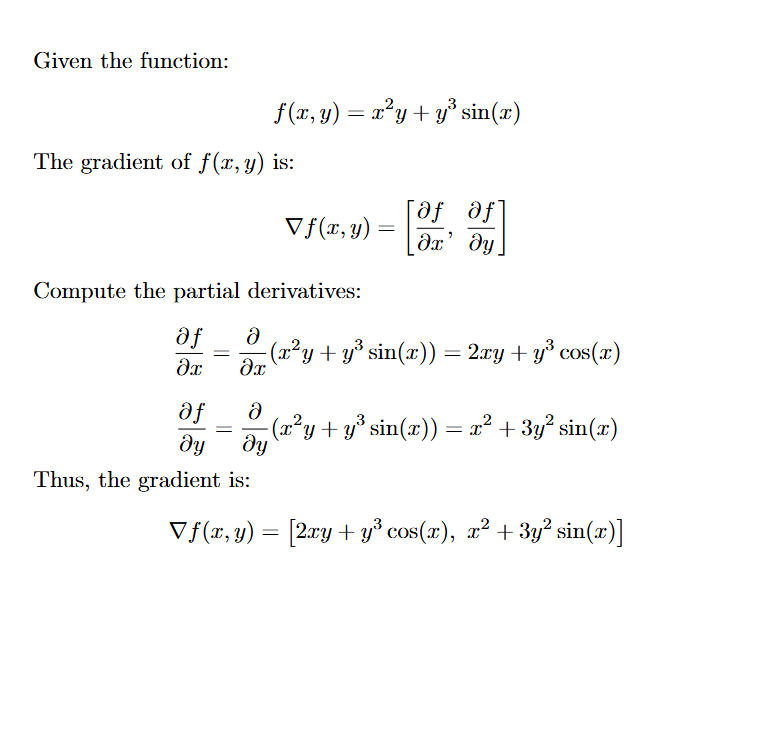

Question 6:) Use sympy to confirm that you obtain the same gradient analytically.



In [ ]:
import sympy as sp

# Declare symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute partial derivatives (gradient)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the results
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)


∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


Question 5) Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax.numpy as jnp
from jax import grad
import numpy as np

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Get gradients with respect to x and y
grad_f_x = grad(f, argnums=0)  # ∂f/∂x
grad_f_y = grad(f, argnums=1)  # ∂f/∂y

# Analytical gradient (for comparison)
def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

# Test at a few random (x, y) values
test_points = [(1.0, 2.0), (0.5, -1.5), (-1.0, 0.3)]

for x_val, y_val in test_points:
    auto_dx = grad_f_x(x_val, y_val)
    auto_dy = grad_f_y(x_val, y_val)
    manual_dx, manual_dy = analytical_grad(x_val, y_val)

    print(f"At (x={x_val}, y={y_val}):")
    print(f"  JAX Gradient    -> ∂f/∂x = {auto_dx:.6f}, ∂f/∂y = {auto_dy:.6f}")
    print(f"  Manual Gradient -> ∂f/∂x = {manual_dx:.6f}, ∂f/∂y = {manual_dy:.6f}")
    print()


At (x=1.0, y=2.0):
  JAX Gradient    -> ∂f/∂x = 8.322418, ∂f/∂y = 11.097651
  Manual Gradient -> ∂f/∂x = 8.322418, ∂f/∂y = 11.097651

At (x=0.5, y=-1.5):
  JAX Gradient    -> ∂f/∂x = -4.461841, ∂f/∂y = 3.486122
  Manual Gradient -> ∂f/∂x = -4.461841, ∂f/∂y = 3.486122

At (x=-1.0, y=0.3):
  JAX Gradient    -> ∂f/∂x = -0.585412, ∂f/∂y = 0.772803
  Manual Gradient -> ∂f/∂x = -0.585412, ∂f/∂y = 0.772803



Question 7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks  # Dictionary: {"Maths": 90, "Physics": 85, ...}

    def __str__(self):
        return f"{self.name} (Roll: {self.roll_number}) - Marks: {self.marks}"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __str__(self):
        return f"Branch: {self.name}, Students: {len(self.students)}"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __str__(self):
        return f"Year: {self.year}, Branches: {len(self.branches)}"


class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year_obj):
        self.years.append(year_obj)

    def __str__(self):
        return f"Database with {len(self.years)} year(s)"


Quetion 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
# Create students
s1 = Student("Neha", 101, {"Maths": 92, "Physics": 89})
s2 = Student("Amit", 102, {"Maths": 85, "Chemistry": 78})
s3 = Student("Ravi", 103, {"Biology": 91, "Chemistry": 88})
s4 = Student("Priya", 104, {"Maths": 75, "Physics": 80})
s5 = Student("Zara", 105, {"Computer": 99, "Maths": 94})

# Create branches and add students
cse_branch = Branch("Computer Science")
cse_branch.add_student(s1)
cse_branch.add_student(s5)

mech_branch = Branch("Mechanical")
mech_branch.add_student(s2)
mech_branch.add_student(s4)

bio_branch = Branch("Biotechnology")
bio_branch.add_student(s3)

# Create years and add branches
year_2021 = Year(2021)
year_2021.add_branch(cse_branch)
year_2021.add_branch(mech_branch)

year_2022 = Year(2022)
year_2022.add_branch(bio_branch)

# Create the database and add years
db = Database()
db.add_year(year_2021)
db.add_year(year_2022)

# Display the entire database structure
print(db)
for year in db.years:
    print(f"\n{year}")
    for branch in year.branches:
        print(f"  {branch}")
        for student in branch.students:
            print(f"    {student}")


Database with 2 year(s)

Year: 2021, Branches: 2
  Branch: Computer Science, Students: 2
    Neha (Roll: 101) - Marks: {'Maths': 92, 'Physics': 89}
    Zara (Roll: 105) - Marks: {'Computer': 99, 'Maths': 94}
  Branch: Mechanical, Students: 2
    Amit (Roll: 102) - Marks: {'Maths': 85, 'Chemistry': 78}
    Priya (Roll: 104) - Marks: {'Maths': 75, 'Physics': 80}

Year: 2022, Branches: 1
  Branch: Biotechnology, Students: 1
    Ravi (Roll: 103) - Marks: {'Biology': 91, 'Chemistry': 88}


Question 9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



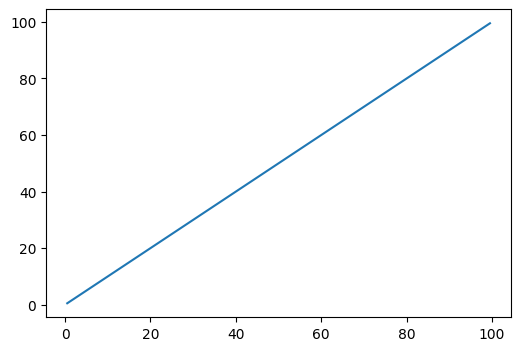

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
y1=x

plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
plt.plot(x,y1)


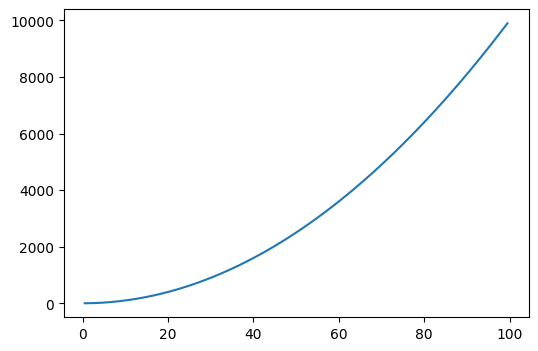

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=x**2
plt.plot(x,y2)


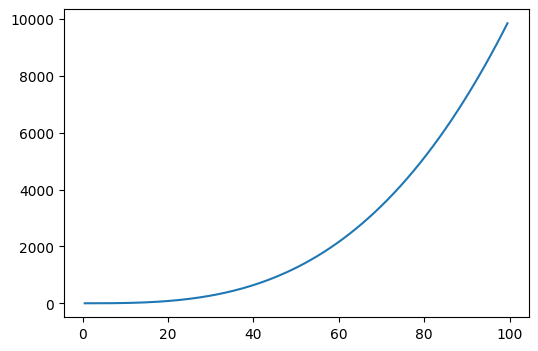

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=x**3/100
plt.plot(x,y2)


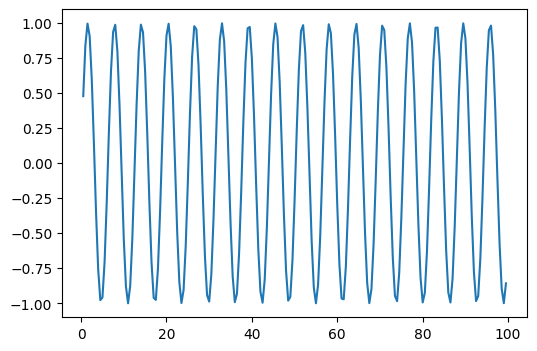

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=np.sin(x)
plt.plot(x,y2)


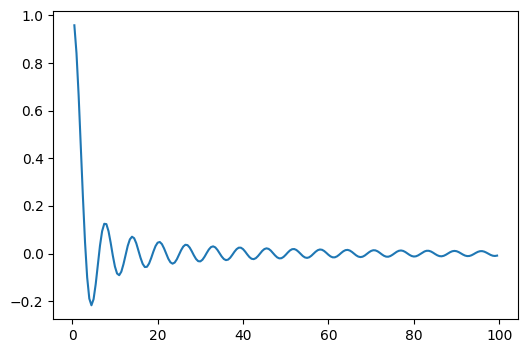

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=np.sin(x)/x
plt.plot(x,y2)


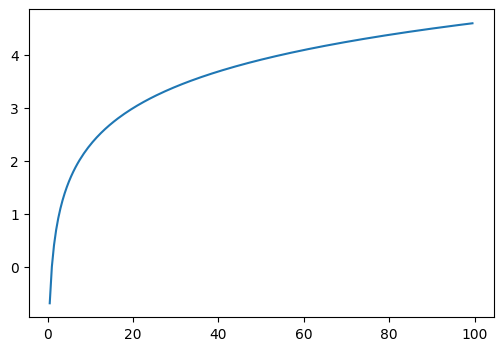

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=np.log(x)
plt.plot(x,y2)


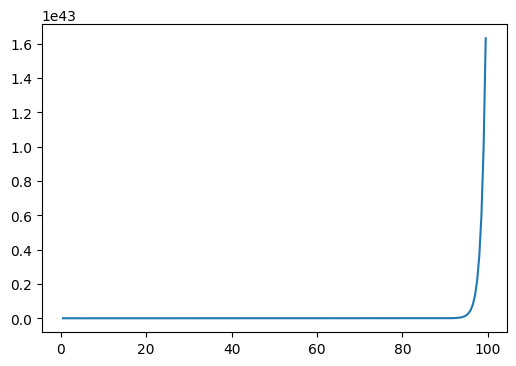

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100,0.5)
plt.figure(figsize=(6, 4))  # 6 inch tall, 4 inch wide
y2=np.exp(x)
plt.plot(x,y2)


Question 10:

In [ ]:
import numpy as np
import pandas as pd
R = 1 + (2-1)* np.random.rand(20,5) #a + (b - a) * np.random.rand(rows, cols)
# a starting point
#b ending point
# here b=2 a=1
df= pd.DataFrame(R)

df = pd.DataFrame(R,columns=['a', 'b', 'c','d','e'])
# print(df)
Standard_Deviation = df.std()
print(Standard_Deviation)
print("Maximum STD_DEV")
print(Standard_Deviation.idxmax())
max_std_column = Standard_Deviation.idxmax()
min_std_column = Standard_Deviation.idxmin()

print(f"Highest std deviation: {max_std_column}")
print(f"Lowest std deviation: {min_std_column}")


a    0.284560
b    0.215248
c    0.253873
d    0.297149
e    0.287240
dtype: float64
Maximum STD_DEV
d
Highest std deviation: d
Lowest std deviation: b


Question 11


In [ ]:
import numpy as np
import pandas as pd
R = 1 + (2-1)* np.random.rand(20,5) #a + (b - a) * np.random.rand(rows, cols)
# a starting point
#b ending point
# here b=2 a=1
df= pd.DataFrame(R)

df = pd.DataFrame(R,columns=['a', 'b', 'c','d','e'])
# print(df)
Standard_Deviation = df.std()
# print(Standard_Deviation)
# print("Maximum STD_DEV")
# print(Standard_Deviation.idxmax())
max_std_column = Standard_Deviation.idxmax()
min_std_column = Standard_Deviation.idxmin()

# print(f"Highest std deviation: {max_std_column}")
# print(f"Lowest std deviation: {min_std_column}")
# df['f'] = np.random.rand(len(df))
df['f'] = df.sum(axis=1)


df['g'] = np.where(df['f'] < 8,"LTG","RTG")

print(df)
num_rows = (df['f'] < 8).sum()
print(f"Total number of rows with f column less than 8:" ,num_rows)
std_lt8 = df[df['g'] == 'LTG']['f'].std()

print(f"Standard Deviation for less than 8:",std_lt8)
std_gt8 = df[df['g'] == 'RTG']['f'].std()
print(f"Standard Deviation for greater than 8:",std_gt8)

           a         b         c         d         e         f    g
0   1.229319  1.073542  1.808211  1.048351  1.096902  6.256324  LTG
1   1.755763  1.939059  1.807472  1.046442  1.600638  8.149374  RTG
2   1.400929  1.402970  1.878800  1.969222  1.451985  8.103906  RTG
3   1.190489  1.898647  1.034257  1.448223  1.197127  6.768742  LTG
4   1.647246  1.249386  1.130427  1.963358  1.567466  7.557883  LTG
5   1.335290  1.711202  1.213641  1.925642  1.645747  7.831521  LTG
6   1.292790  1.458364  1.316024  1.685926  1.047542  6.800646  LTG
7   1.144229  1.681567  1.168723  1.574688  1.666810  7.236016  LTG
8   1.991510  1.327840  1.401275  1.946999  1.667812  8.335437  RTG
9   1.564032  1.945307  1.784679  1.367893  1.302734  7.964646  LTG
10  1.875694  1.553705  1.053201  1.358711  1.681592  7.522904  LTG
11  1.427049  1.401414  1.693874  1.881091  1.563810  7.967238  LTG
12  1.573739  1.292046  1.242187  1.724028  1.168162  7.000162  LTG
13  1.973131  1.461763  1.749393  1.356359  1.73

Question 12



In [ ]:
import numpy as np
#Numpy Array Broadcasting is the ability of NumPy to treat arrays of different dimensions during arithmetic operations.
#
b = np.array([10, 20, 30])

result = A + b
print(result)
# Broadcasting

[[11 22 33]
 [14 25 36]]


Question 13:


In [ ]:
import numpy as np

def argmin(arr):
  arr = np.asarray(arr).flatten() # it will make a single list even if the user gives a 2D, Dictionary or a tuple
  min = arr[0]
  Minimum_index= 0
  for i in range(1,len(arr)):
    if(arr[i]<min):
      min = arr[i]
      Minimum_index = i
  return Minimum_index
a = [8, 3, 5, 1, 4,9]
b= [[8,3],[5,1],[4,9]]
print("Using argmin function=",argmin(b))
print("Using numpy=",np.argmin(a))


Using argmin function= 3
Using numpy= 3
